## № 1

#### Условие
Предложите вычислительно устойчивый способ вычилить функцию $f(x, a) = \sqrt{x+a} - \sqrt{x}$ при положительных $x$ и $a$.

#### Решение

Проблема может возникнуть, когда $x$ велик по сравнению с $a$. В предельном случае из-за округлений при вычислениях с плавающей точкой может даже оказаться, что `x + a == x.`

Чтобы не выполнять вычитание двух близких чисел, заметим, что
$$
(\sqrt{x+a} - \sqrt{x})(\sqrt{x+a} + \sqrt{x}) = a
$$
Следовательно, $f(x, a)$ можно вычислять как
$$
\sqrt{x+a} - \sqrt{x} = \frac{a}{\sqrt{x+a} + \sqrt{x}}
$$

Тогда, даже если из-за округлений окажется, что `x + a == x`, вычисленное значение $f(x,a)$ не будет равно $0$. Оно будет равно $\dfrac{a}{2 \sqrt x}$, что является разумным приближением.

Другой способ — это выспользоваться рядом Тейлора:
$$
\sqrt{x+a} - \sqrt{x} 
= \sqrt{x} \cdot \left(\sqrt{1 + \frac{a}{x}} - 1 \right) 
= \sqrt{x} \cdot \sum_{k = 1}^{\infty} \binom{1/2}{k} \biggl(\frac{a}{x}\biggr)^k
$$
Коэффициенты при $(a/x)^k$ и $(a/x)^{k-1}$ связаны соотношением
$$
\binom{1/2}{k} = \binom{1/2}{k-1} \cdot \frac{1/2 - k + 1}{k}
$$
Но такой способ будет плохо работать при $a \gg x$. Нужно будет комбинировать.

## № 2

#### Условие

Вычислите $\tan(10^{100})$ с помощью `mpmath`, вычислите число обусловленности. Сколько цифр нужно хранить в памяти при промежуточных вычислениях, чтобы получить ответ с точностью в 7 значащих цифр?

#### Решение

In [1]:
from mpmath import *

In [2]:
mp.dps = 7

In [3]:
mp.tan(10**100)

mpf('0.4012319632')

Относительное число обусловленности
$$
\kappa = \frac{
    \|\delta f\| / \|f\|
}{
    \|\delta x\| / \|x\|
}
= \left| \frac{
    f' \cdot \delta x / f
}{
    \delta x / x
} \right|
= \left| x \cdot \frac{f'}{f} \right|
= 10^{100} \cdot \frac{1}{\sin(x) \cos(x)}
$$

In [4]:
factor = 1 / mp.sin(10**100) / mp.cos(10**100)

print(f'rel_cond_number = {nstr(factor)} * 10^100')

rel_cond_number = 2.89356 * 10^100


Чтобы ответить на вопрос про цифры, вычислим также абсолютное число обусловленности:
$$
\kappa_\text{abs} 
= \frac{\|\delta f\|}{\|\delta x\|} 
= |f'|
$$
Для того чтобы в ответе было 7 верных цифр после запятой, нужно, чтобы $|\delta f| < 10^{-7}$.

Следовательно, нужно, чтобы
$$
|\delta x| < 
\frac{10^{-7}}{\kappa_\text{abs}} = 0.86 \cdot 10^{-7}
$$

In [5]:
mp.cos(10**100)**2

mpf('0.8613360301')

Такое достигается, если $x = 10^{100}$ известно с точностью 108 значащих цифр (101 до запятой и 7 после запятой).

Провести эксперимент с использованием `mpmath` невозможно, поскольку `mpmath` не позволяет контролировать точность на промежуточных шагах. Но это можно сделать в Wolfram Mathematica: 

<div style="max-width: 600px; margin: auto">
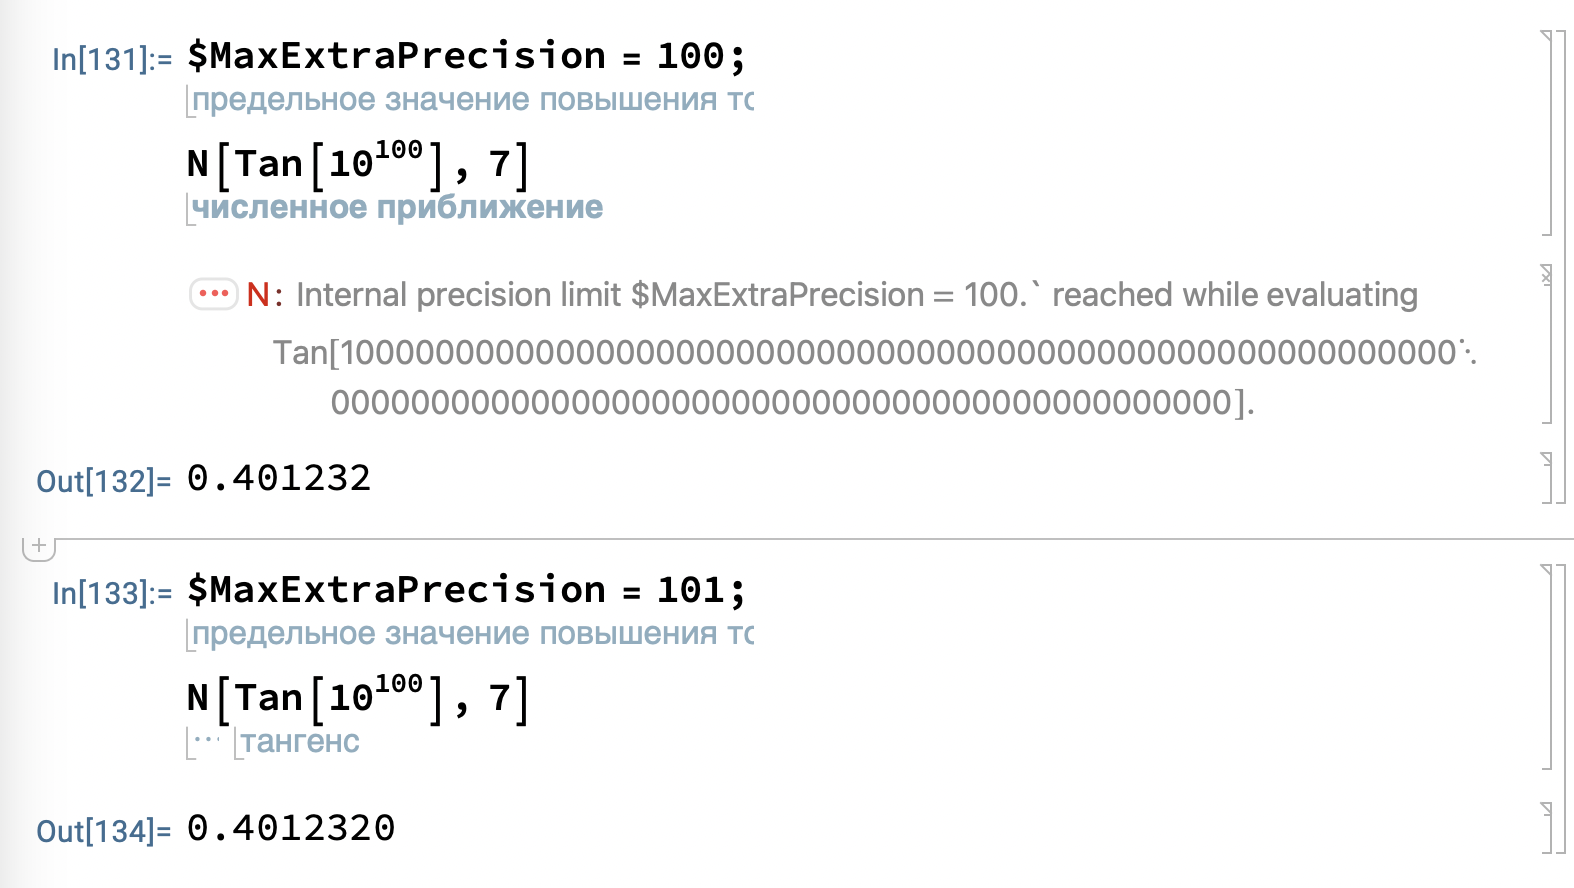
</div>

В Wolfram выражение `N[expr, n]` пытается вычислить `expr` с точностью в `n` цифр, в процессе увеличивая точность не более чем на `$MaxExtraPrecision` значащих цифр. По умолчанию `$MaxExtraPrecision = 50.` Из скриншота видно, что точности 100+7 значащих цифр не хватает, а 101+7 — уже достаточно.

## № 4

#### Условие

Реализуйте функцию `solve_quad(b, c)`, возвращающую корни приведённого квадратного уравнения $x^2 + b x + c = 0$. Корни могут повторяться или быть комплексными.

Когда вам покажется, что функция работает, запустите её на следующих пяти тестах. Добейтесь того, чтобы она правильно работала на каждом из них.

In [6]:
tests = [{'b': 4.0,   'c': 3.0},
         {'b': 2.0,   'c': 1.0},
         {'b': 0.5,   'c': 4.0},
         {'b': 1e10,  'c': 3.0},
         {'b': -1e10, 'c': 4.0}]

#### Решение

Аналогично №1, может возникнуть проблема при вычислении $-b \pm \sqrt{b^2 - 4ac}$, если $c$ мало по сравнению с $b$, и если $-b$ и $\sqrt{b^2 - 4ac}$ имеют разные знаки.

Решением будет сначала вычислить стабильный корень (у которого $-b$ и $\sqrt{b^2 - 4ac}$ имеют одинаковые знаки и вычитания двух близких чисел не происходит), а потом воспользоваться теоремой Виета.

In [7]:
import math

def solve_quad(b, c):
    D_sqrt = (b**2 - 4*c) ** 0.5
    sign_b = math.copysign(1, b)
    x1 = (-b - sign_b * D_sqrt) / 2
    x2 = c / x1
    return x1, x2

In [8]:
def quadratic(x, b, c):
    return x**2 + b*x + c

In [9]:
def solve_and_test_roots(b, c):
    x1, x2 = solve_quad(b, c)

    return quadratic(x1, b, c), quadratic(x2, b, c)

In [10]:
[solve_and_test_roots(**bc) for bc in tests]

[(0.0, 0.0),
 (0.0, 0.0),
 ((-8.881784197001252e-16+4.440892098500626e-16j),
  (4.440892098500626e-16-2.220446049250313e-16j)),
 (3.0, 0.0),
 (4.0, 0.0)]

В последних двух примерах после подстановки найденных корней значение трехчлена не равно $0$. Это связано с тем, что корень по модулю большой $(\sim 10^{10})$ и числа float расположены достаточно редко. Истинный корень расположен между последовательными числами float, и его невозможно записать точно.

In [11]:
x1, x2 = solve_quad(**tests[-1])
x1

10000000000.0

In [12]:
quadratic(x1, **tests[-1])

4.0

Соседние с `x1` числа с плавающей точкой при подставноке дают ещё более далёкий от нуля результат:

In [13]:
quadratic(math.nextafter(x1, math.inf), **tests[-1])

16388.0

In [14]:
quadratic(math.nextafter(x1, -math.inf), **tests[-1])

-16380.0

Следовательно, значение `x1`, которое выдала наша функция — это наилучшее возможное приближение к истинному корню, которое вообще можно записать в виде числа float.

## № 5

#### Условие
Рассмотрите многочлен
$$
w(x) = \prod_{r=1}^{20} (x-r) = \sum_{i=0}^{20} a_i x^i
$$
и исследуйте число обусловленности его корней, выступающих в роли функций от коэффициентов $a_i$. Проведите эксперимент: случайным образом измените коэффициенты и найдите новые корни с помощью алгоритма из `numpy`.
Коэффициенты изменяйте по правилу $a_i \to n_i a_i$, где $n_i$ подчиняются нормальному распределению с математическим ожиданием, равным 1, и стандартным отклонением, равным $10^{-10}$. Проведите 100 таких экспериментов и изобразите результаты на одном графике вместе с корнями исходного многочлена.

Оцените по одному из экспериментов абсолютное и относительное число обусловленности корней многочлена как функций его коэффициентов. 

In [15]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial

In [16]:
factors = [Polynomial([-r, 1]) for r in range(1, 21)]

w = np.product(factors)
w

Polynomial([ 2.43290201e+18, -8.75294804e+18,  1.38037598e+19, -1.28709312e+19,
        8.03781182e+18, -3.59997952e+18,  1.20664780e+18, -3.11333643e+17,
        6.30308121e+16, -1.01422999e+16,  1.30753501e+15, -1.35585183e+14,
        1.13102770e+13, -7.56111184e+11,  4.01717716e+10, -1.67228082e+09,
        5.33279460e+07, -1.25685000e+06,  2.06150000e+04, -2.10000000e+02,
        1.00000000e+00], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [17]:
# по какой-то причине невозмущённый многочлен уже выдаёт неправильные корни
w.roots()

array([ 1.        ,  2.        ,  3.        ,  3.99999996,  5.00000089,
        5.99998763,  7.00011141,  7.99930804,  9.00311343,  9.98985818,
       11.02597478, 11.9531318 , 13.06972525, 13.92557394, 15.05795681,
       15.96465686, 17.01381012, 17.99627235, 19.00055098, 19.99996758])

In [18]:
def perturabte_and_solve(w):
    pert = np.random.normal(1, 10**-10, 21)
    w2 = Polynomial(w.coef * pert)
    return w2.roots()

In [19]:
experimental_roots = np.array([perturabte_and_solve(w) for _ in range(100)])

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

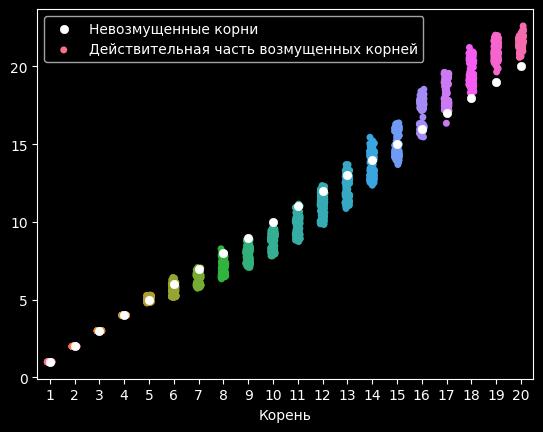

In [21]:
sns.scatterplot(range(1, 21), zorder = 100, color = 'white')
sns.stripplot(experimental_roots.real)

plt.xlabel('Корень')
plt.xticks(ticks = list(range(20)), labels = list(range(1, 21)))
plt.legend(['Невозмущенные корни', 'Действительная часть возмущенных корней'])
plt.show()

Вычислим число обусловленности по одному эксперименту:

In [22]:
pert = np.random.normal(1, np.exp(-5), 21)
w2 = Polynomial(w.coef * pert)

d_a = np.linalg.norm(w2.coef - w.coef)
a = np.linalg.norm(w.coef)

d_roots = np.linalg.norm(w2.roots() - np.arange(1, 21))
roots = np.linalg.norm(np.arange(1, 21))

In [23]:
# относительное число обусловленности
(d_roots / roots) / (d_a / a)

646.2346916532553

In [24]:
# абсолютное число обусловленности
d_roots / d_a

1.5213340870494617e-15

## № 5

#### Условие

Рассмотрим задачу наименьших квадратов — $Ax\approx b$:
$$
A = \begin{bmatrix}
1 & 1\\
1 & 1.00001\\
1 & 1.00001
\end{bmatrix},\quad b = \begin{bmatrix}
2 \\
0.00001 \\
4.00001 
\end{bmatrix}
$$

Формально решение можно найти как
$$
x = ( A^T A )^{-1} A^T b
\tag{1}
$$
Вычислите его по этой формуле аналитически.

#### Решение

Обозначим $10^{-5} = \varepsilon$ и воспользуемся `sympy`.

In [25]:
from sympy import *

In [26]:
e = Symbol(r'\varepsilon')

A = Matrix([
    [1, 1    ],
    [1, 1 + e],
    [1, 1 + e],
])

b = Matrix([2, e, 4 + e])

In [27]:
sol = (A.T * A).inv() * A.T * b
sol

Matrix([
[\varepsilon*(1 + 2/\varepsilon + (-2*\varepsilon - 3)*(\varepsilon + 1)/(2*\varepsilon**2) + 3/(2*\varepsilon**2)) + (\varepsilon + 4)*(1 + 2/\varepsilon + (-2*\varepsilon - 3)*(\varepsilon + 1)/(2*\varepsilon**2) + 3/(2*\varepsilon**2)) + 2 + 4/\varepsilon + (-2*\varepsilon - 3)/\varepsilon**2 + 3/\varepsilon**2],
[                                                            \varepsilon*((-2*\varepsilon - 3)/(2*\varepsilon**2) + 3*(\varepsilon + 1)/(2*\varepsilon**2)) + (\varepsilon + 4)*((-2*\varepsilon - 3)/(2*\varepsilon**2) + 3*(\varepsilon + 1)/(2*\varepsilon**2)) + (-2*\varepsilon - 3)/\varepsilon**2 + 3/\varepsilon**2]])

In [28]:
sol.subs(e, 10**-5)

Matrix([
[0.999988555908203],
[0.999996185273631]])

#### Условие

Вычислите $(1)$ с помощью `numpy`, используя числа одинарной и двойной точности; сравните результат c аналитическим.

#### Решение

In [29]:
# одинарная точность

A = np.array([
    [1, 1],
    [1, 1.00001],
    [1, 1.00001]
], dtype = 'float32')
b = np.array([2, 0.00001, 4.00001], dtype = 'float32')

np.linalg.inv(A.T @ A) @ A.T @ b

# Вообще не похоже на аналитический

array([1612.1589, 1461.854 ], dtype=float32)

In [30]:
# двойная точность

Ad = np.array([
    [1, 1],
    [1, 1.00001],
    [1, 1.00001]
])
bd = np.array([2, 0.00001, 4.00001])

np.linalg.inv(Ad.T @ Ad) @ Ad.T @ bd

# Близко к аналитическому, но x[0] должно быть < 1.

array([1.000005  , 0.99999857])

#### Условие

Помимо формулы $(1)$, реализуйте решение, основанное на сингулярном разложении. Какой способ вычислительно более стабильный?

#### Решение

Перепишем формулу $(1)$, сингулярно разложив матрицу $A = U S V^\dagger$:
$$
\begin{aligned}
x 
&= (A^\dagger A)^{-1} A^\dagger b
 = (V S^\dagger S V^\dagger)^{-1} V S^\dagger U^\dagger b \\
&= V (S^\dagger S)^{-1} S^\dagger U^\dagger b
\end{aligned}
$$
Так как матрица $S$ диагональная,
$$
(S^\dagger S)^{-1} S^\dagger = 
\begin{bmatrix}
1/s_1 & 0     & 0 \\
0     & 1/s_2 & 0 \\
\end{bmatrix}
$$

In [31]:
# Одинарная точность
u, s, vh = np.linalg.svd(A)

In [32]:
vh.T / s @ u.T[:2] @ b

array([0.984375, 1.      ], dtype=float32)

In [33]:
# Двойная точность
u, s, vh = np.linalg.svd(Ad)
vh.T / s @ u.T[:2] @ bd

array([1., 1.])

В случае одинарной точности метод через SVD помогает улучшить стабильность, в случае двойной точности эффект не так заметен.

#### Условие

Решите эту же задачу с помощью `np.linalg.lstsq`. Какой алгоритм использует эта функция?

In [34]:
np.linalg.lstsq(A, b, rcond = None)

(array([1.0006781, 0.9993219], dtype=float32),
 array([8.], dtype=float32),
 2,
 array([2.449498e+00, 5.781324e-06], dtype=float32))

In [35]:
np.linalg.lstsq(Ad, bd, rcond = None)

(array([1., 1.]), array([8.]), 2, array([2.44949791e+00, 5.77348345e-06]))

Какой используется алгоритм — незадокументировано.

Однако в исходном коде [1](https://github.com/numpy/numpy/blob/8cec82012694571156e8d7696307c848a7603b4e/numpy/linalg/linalg.py#L2278), [2](https://github.com/numpy/numpy/blob/8cec82012694571156e8d7696307c848a7603b4e/numpy/linalg/umath_linalg.cpp#L3977) упоминается функция [gelsd](https://netlib.org/lapack/explore-html/d7/d3b/group__double_g_esolve_ga94bd4a63a6dacf523e25ff617719f752.html) из LAPACK, которая использует алгоритм, основанный на SVD. 

#### Условие

Какие четыре числа обусловленности, относящиеся к этой задаче, упоминаются в теореме 18.1 из книги Numerical Linear Algebra (Trefethen, 1997)?
Приведите примеры таких $\delta b$ и $\delta A$, при которых приблизительно достигаются оценки на $\|\delta x\|$, даваемые числами обусловленности.

#### Фрагмент из книги Numerical Linear Algebra

Let $b \in C^m$ and $A \in C^{m \times n}$ of full rank be fixed. The least squares problem $\left(\|Ax - b\| \to \min \right)$ has the following 2-norm relative condition numbers describing the sensitivities of $x$ and $y \coloneqq Ax$ to perturbations in $b$ and $A$:

|     | y                       | x |
|:---:|:-----------------------:|:-:|
|**b**| $1 / \cos\theta$        | $\kappa(A) / \eta \cos\theta$ |
|**A**| $\kappa(A) / \cos\theta$| $\kappa(A) + \kappa(A)^2 \tan\theta / \eta$

Под $\theta$ подразумевается $\arccos\biggl(\dfrac{\|y\|}{\|b\|}\biggr)$, под $\kappa(A) = \dfrac{\sigma_{\max}}{\sigma_{\min}}$ — число обусловленности, под $\eta$ — выражение $\dfrac{\|A\| \|x\|}{\|Ax\|}.$

#### Решение:
Cначала вычислим эти относительные числа обусловленности:

In [36]:
from numpy.linalg import norm

x = np.array(sol.subs(e, 10**-5)).astype(float).flatten()
y = Ad @ x

In [37]:
kappa = s[0] / s[-1]
kappa

424266.8971462293

In [38]:
theta = np.arccos(norm(y) / norm(bd))
theta

0.684726914052779

In [39]:
eta = s[0] * norm(x) / norm(y)
eta

1.0000000000001157

In [40]:
cond_numbers = {
    'y(b)': 1 / np.cos(theta),
    'x(b)': kappa / eta / np.cos(theta),
    'y(A)': kappa / np.cos(theta),
    'x(A)': kappa + kappa**2 * np.tan(theta) / eta,
}
cond_numbers

{'y(b)': 1.2910025769862699,
 'x(b)': 547729.6575456873,
 'y(A)': 547729.6575457506,
 'x(A)': 146974081797.72705}

Предположим, что $\delta b$, при котором достигаются оценки погрешностей, пропорционален сингулярному вектору $A$ с наименьшим сингулярным значением (у псевдообратной матрицы этот вектор наоборот будет соответствовать наибольшему сингулярному значению).

In [41]:
eps = 0.1
db = eps * u.T[1]

In [42]:
dx = np.linalg.lstsq(Ad, db, rcond = None)[0]

In [43]:
(norm(dx)/norm(x)) / (eps/norm(b)), cond_numbers['x(b)']
# what

(547729.6797482893, 547729.6575456873)

In [44]:
(norm(Ad@dx) / norm(y)) / (eps/norm(b)), cond_numbers['y(b)']

(1.2910026293123884, 1.2910025769862699)

$\delta A$ можно попробовать искать в виде $u v^\dagger$, где $u$ и $v$ — столбцы матриц $U$ и $V$. Однако каких-либо адекватных результатов не получилось. 

In [45]:
dA = eps * np.outer(u[0], vh[0])

In [46]:
dx = np.linalg.lstsq(Ad + dA, b, rcond = None)[0] - x

In [47]:
(norm(dx) / norm(x)) / (eps / norm(Ad)), cond_numbers['x(A)']

(349810.0340994635, 146974081797.72705)

In [48]:
(norm(Ad@dx) / norm(y)) / (eps / norm(Ad)), cond_numbers['y(A)']

(1.020717868118708, 547729.6575457506)

## № 6

In [49]:
A = Matrix([
    [e, 1, 0],
    [1, 1, 1],
    [0, 1, 1],
])
A

Matrix([
[\varepsilon, 1, 0],
[          1, 1, 1],
[          0, 1, 1]])

#### Условие
Аналитически найдите LU-разложение матрицы $A$ с применением выбора главного элемента и без него. Объясните, почему при $|\epsilon|\ll 1$ мы можем неправильно оценить множители $L$ и $U$ в арифметике конечной точности.

#### Решение

In [50]:
# C выбором главного элемента
L, U, perm = A.LUdecomposition()

In [51]:
L

Matrix([
[          1,               0, 0],
[          0,               1, 0],
[\varepsilon, 1 - \varepsilon, 1]])

In [52]:
U

Matrix([
[1, 1,  1],
[0, 1,  1],
[0, 0, -1]])

In [53]:
perm

[[0, 1], [1, 2]]

In [54]:
# Без выбора главного элемента
L, U, perm = A.LUdecomposition(iszerofunc = lambda x: False)

In [55]:
L

Matrix([
[            1,                     0, 0],
[1/\varepsilon,                     1, 0],
[            0, 1/(1 - 1/\varepsilon), 1]])

In [56]:
U

Matrix([
[\varepsilon,                 1,                         0],
[          0, 1 - 1/\varepsilon,                         1],
[          0,                 0, 1 - 1/(1 - 1/\varepsilon)]])

In [57]:
perm

[]

При $\varepsilon \approx 0$ могут возникнуть неточности при вычислении выражений с $1/\varepsilon$, которые возникают во варианте без пивотинга. А при $\varepsilon \approx 1$ будут проблемы с вычислением $\frac{1}{1 - 1/\varepsilon}.$

## № 7

#### Условие

Пусть функция $f(n, \alpha)$ определена следующим образом:
$$
\begin{aligned}
    f(n,\alpha) &= \frac{1}{n} - \alpha f(n-1,\alpha) \\
    f(0,\alpha) &= \ln(1+1/\alpha)
\end{aligned}
$$
Вычислите $f(20, 0.1)$ и $f(20, 10)$ с помощью арифметики обычной (двойной) точности, а затем с помощью арифметики произвольной точности.

#### Решение

In [58]:
from functools import lru_cache

In [59]:
@lru_cache
def f_double(n, a):
    if n == 0:
        return np.log1p(1 / a)
    else:
        return 1/n - a * f_double(n-1, a)

In [60]:
mp.dps = 64

In [61]:
@lru_cache
def f_mpf(n, a):
    if n == 0:
        return mp.log1p(mpf(1) / a)
    else:
        return mpf(1) / n - a * f_mpf(n-1, a)

In [62]:
f_double(20, 0.1), f_mpf(20, 0.1)

(0.045239221952429354,
 mpf('0.04523922195242935245858041690393530986774908073160529352111067169114'))

In [63]:
f_double(20, 10), f_mpf(20, 10)

(822.1298733338632,
 mpf('0.004347035818028109090259473900056452612527288744123017261528153768864'))

In [64]:
differences_01 = [(f_mpf(n, 0.1) - f_double(n, 0.1)) / f_mpf(n, 0.1) for n in range(31)]

In [65]:
differences_10 = [(f_mpf(n, 10) - f_double(n, 10)) / f_mpf(n, 10) for n in range(31)]

Text(0.5, 1.0, '(f_mpf - f_double) / f_mpf / float.eps')

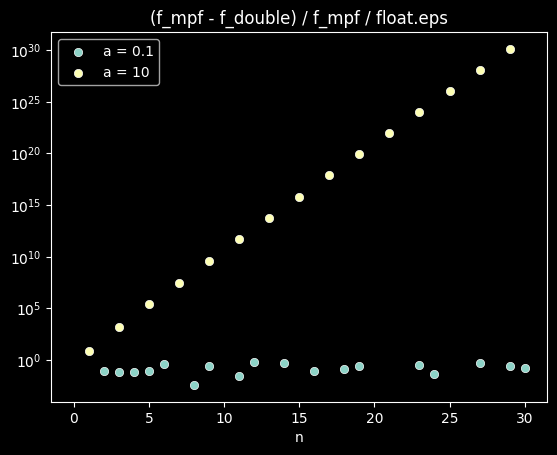

In [66]:
sns.scatterplot(differences_01 / np.finfo(float).eps, label = 'a = 0.1')
sns.scatterplot(differences_10 / np.finfo(float).eps, label = 'a = 10')

plt.yscale('log')
plt.xlabel('n')
plt.title('(f_mpf - f_double) / f_mpf / float.eps')

#### Условие
Как бы вы стали вычислять $f(30, 10)$ без арифметики произвольной точности?

#### Решение

Обозначим $\beta = 1 / \alpha$, тогда $f(0, \alpha) = \ln(1 + \beta)$, а
$$
\begin{aligned}
f(n, \alpha) &= \frac1n - \alpha
\left(\frac1{n-1} -\alpha
    \Bigl(\frac1{n-2} - \alpha(\dots)\Bigr)
\right) \\
&= \frac1n - \frac{\alpha}{n-1} + \frac{\alpha^2}{n-2} - \dots + (-\alpha)^{n-1} + (-\alpha)^n f(0, \alpha) \\
&= (-\alpha)^n \left(f(0, \alpha) - \beta + \frac{\beta^2}{2} \dots + \frac{(-\beta)^n}{n}\right)
\end{aligned}
$$
Слагаемые с $\beta$ в скобках совпадают с первыми $n$ членами ряда Тейлора функции $-\ln(1+\beta)$.

Если разложить в ряд Тейлора $f(0, \alpha) = \ln(1 + \beta)$ и подставить в формулу выше, то первые $n$ членов сократятся и останется
$$
\begin{aligned}
f(n, \alpha) 
&= -(-\alpha)^n \sum_{k=n+1}^{\infty}\frac{(-\beta)^k}{k}
&= - \sum_{l=1}^{\infty}\frac{(-\beta)^l}{l+n}
\end{aligned}
$$
При больших $\alpha$ ряд должен быстро сходиться. Для оценки по порядку величины можно взять первый член, он приблизительно равен $\dfrac1{\alpha n}$, что даёт оценку
$$
f(30, 10) \approx 0.003
$$
Для сравнения, результат с помощью `mpmath`:

In [67]:
f_mpf(30, 10)

mpf('0.002940928704861326874348801708648920592375767538987405922134977204965')